<h1>Harris Corner Detection</h1>

Example 4.8

In [11]:
# import pyhton modules
from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import corner_harris, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

Create test image and apply harris detector.

In [12]:
# Sheared checkerboard
tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(110, 30))
image = warp(data.checkerboard()[:90, :90], tform.inverse,
             output_shape=(200, 310))
# Ellipse
rr, cc = ellipse(160, 175, 10, 100)
image[rr, cc] = 1
# Two squares
image[30:80, 200:250] = 1
image[80:130, 250:300] = 1

# Peak coordinates
%timeit corner_peaks(corner_harris(image), min_distance=5, threshold_rel=0.02)
coords = corner_peaks(corner_harris(image), min_distance=5, threshold_rel=0.02)

4.12 ms ± 2.62 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Plot results

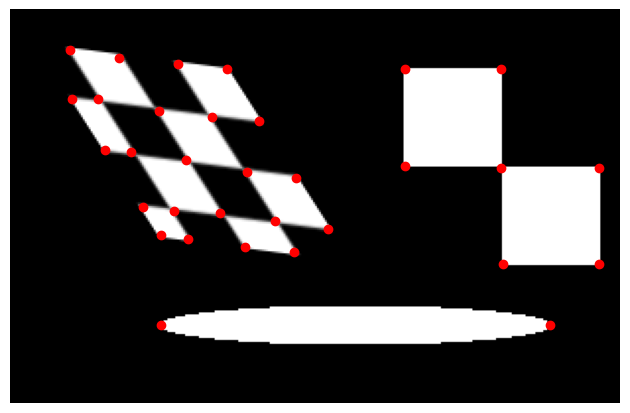

In [13]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='red', marker='o',
        linestyle='None', markersize=6)
ax.axis('off')
plt.tight_layout()
plt.savefig('harris')
plt.show()